In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


#Pre-processing
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
import string
import warnings
warnings.filterwarnings('ignore')
import re

#for execution time
import time



- Load data from JSON
- group by data bycategories and select first 1000 observations from each category. 
- Filter dataframe based on 6 categories.
- Create the summary feature and subset the dataframe to contain only the summary and the category(target)

In [2]:
df = pd.read_json('../data/final_project/News_Category_Dataset_v2.json', lines=True)


In [3]:
df = df.groupby(by='category').head(1000)

category_list = ['POLITICS', 'ENTERTAINMENT', 'TRAVEL', 'BUSINESS', 'SPORTS', 'RELIGION']
df = df[df['category'].isin(category_list)]
df['summary'] = df['headline'] + '. ' +  df['short_description']
df = df[['summary','category']]

**Preprocess summaries**

In [4]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_summary(text):
    text = text.lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

df['summary'] = df['summary'].apply(clean_summary)

**Extract all_data and all_labels**

In [5]:
all_data = df['summary']
all_labels = df['category']

Function for sklearn

In [6]:
X_train, X_test, y_train, y_test = (train_test_split(all_data, all_labels, train_size=.8,random_state=1))


In [7]:
def sklearn_models(model,X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    labels = model.predict(X_test)
    mat = confusion_matrix(y_test, labels)


    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

    plt.xlabel('true label')
    plt.ylabel('predicted label')    
    plt.show()
    print('Accuracy score:', accuracy_score(y_test, labels))

    print("Execution time: %s seconds " % (time.time() - start_time))
    
    
    

# Model 1: Multinomial Naive Bayes

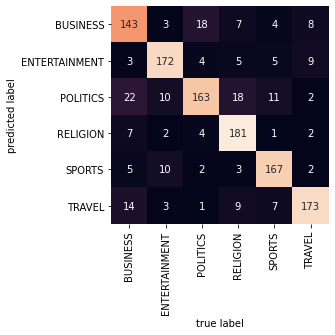

Accuracy score: 0.8325
Execution time: 0.4755277633666992 seconds 


In [8]:
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())
sklearn_models(model1, X_train, X_test, y_train, y_test)

# Model 2: Multi-Layer Perceptron Network with tf-idf scores

In [13]:
MultinomialNB?

Iteration 1, loss = 1.77537315
Iteration 2, loss = 1.61022271
Iteration 3, loss = 1.32700633
Iteration 4, loss = 0.99332663
Iteration 5, loss = 0.68819580
Iteration 6, loss = 0.46179986
Iteration 7, loss = 0.31331514
Iteration 8, loss = 0.22063993
Iteration 9, loss = 0.16065291
Iteration 10, loss = 0.12161388
Iteration 11, loss = 0.09458592
Iteration 12, loss = 0.07571679
Iteration 13, loss = 0.06168700
Iteration 14, loss = 0.05128283
Iteration 15, loss = 0.04333939
Iteration 16, loss = 0.03717822
Iteration 17, loss = 0.03227885
Iteration 18, loss = 0.02835914
Iteration 19, loss = 0.02515838
Iteration 20, loss = 0.02247165
Iteration 21, loss = 0.02023168
Iteration 22, loss = 0.01835489
Iteration 23, loss = 0.01674756
Iteration 24, loss = 0.01536555
Iteration 25, loss = 0.01416605
Iteration 26, loss = 0.01312108
Iteration 27, loss = 0.01221158
Iteration 28, loss = 0.01139945
Iteration 29, loss = 0.01068973
Iteration 30, loss = 0.01005011
Iteration 31, loss = 0.00947935
Iteration 32, los

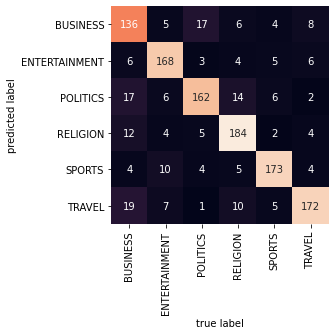

Accuracy score: 0.8291666666666667
Execution time: 71.45645785331726 seconds 


In [9]:
model2a = make_pipeline(TfidfVectorizer(), MLPClassifier(verbose=True))
sklearn_models(model2a, X_train, X_test, y_train, y_test)

Let's try two hidden layers instead of 1

Iteration 1, loss = 1.77185025
Iteration 2, loss = 1.55511190
Iteration 3, loss = 1.06304857
Iteration 4, loss = 0.47472016
Iteration 5, loss = 0.16881143
Iteration 6, loss = 0.06994400
Iteration 7, loss = 0.03599372
Iteration 8, loss = 0.02216721
Iteration 9, loss = 0.01542358
Iteration 10, loss = 0.01139130
Iteration 11, loss = 0.00886712
Iteration 12, loss = 0.00719179
Iteration 13, loss = 0.00595408
Iteration 14, loss = 0.00505658
Iteration 15, loss = 0.00436229
Iteration 16, loss = 0.00381858
Iteration 17, loss = 0.00338853
Iteration 18, loss = 0.00303670
Iteration 19, loss = 0.00272602
Iteration 20, loss = 0.00243742
Iteration 21, loss = 0.00218702
Iteration 22, loss = 0.00197573
Iteration 23, loss = 0.00180316
Iteration 24, loss = 0.00165770
Iteration 25, loss = 0.00153836
Iteration 26, loss = 0.00143800
Iteration 27, loss = 0.00135186
Iteration 28, loss = 0.00127935
Iteration 29, loss = 0.00121650
Iteration 30, loss = 0.00115566
Iteration 31, loss = 0.00107548
Iteration 32, los

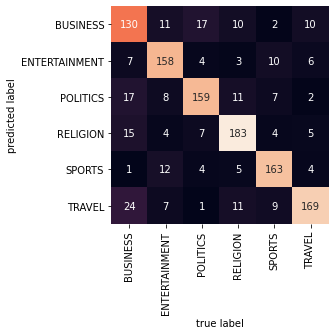

Accuracy score: 0.8016666666666666
Execution time: 47.59353804588318 seconds 


In [10]:
model2b = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(100,100),verbose=True))
sklearn_models(model2b, X_train, X_test, y_train, y_test)

Now three hidden layers

Iteration 1, loss = 1.77745527
Iteration 2, loss = 1.54900999
Iteration 3, loss = 0.77499610
Iteration 4, loss = 0.13733573
Iteration 5, loss = 0.02292587
Iteration 6, loss = 0.00816837
Iteration 7, loss = 0.00480620
Iteration 8, loss = 0.00334772
Iteration 9, loss = 0.00254348
Iteration 10, loss = 0.00202335
Iteration 11, loss = 0.00166297
Iteration 12, loss = 0.00138970
Iteration 13, loss = 0.00116214
Iteration 14, loss = 0.00096601
Iteration 15, loss = 0.00080389
Iteration 16, loss = 0.00068701
Iteration 17, loss = 0.00060502
Iteration 18, loss = 0.00053864
Iteration 19, loss = 0.00048407
Iteration 20, loss = 0.00044443
Iteration 21, loss = 0.00041577
Iteration 22, loss = 0.00039596
Iteration 23, loss = 0.00038089
Iteration 24, loss = 0.00036946
Iteration 25, loss = 0.00036027
Iteration 26, loss = 0.00035298
Iteration 27, loss = 0.00034679
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


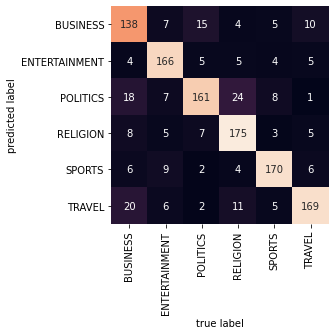

Accuracy score: 0.8158333333333333
Execution time: 52.28928470611572 seconds 


In [11]:
model2c = make_pipeline(TfidfVectorizer(), MLPClassifier(hidden_layer_sizes=(100,100,100),verbose=True))
sklearn_models(model2c, X_train, X_test, y_train, y_test)